# Comparison of the performance of the trained models with the paper results

This notebook takes the shallow and deep models trained before and compares their performance with the published results in the paper *Searching for Exotic Particles in High-Energy Physics with Deep Learning* by Balid et al.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
np.random.seed(1234)
import h5py
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from keras.models import load_model

/home/stefan/py2_virtualenv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the dataset, the pre-processing parameters and the models

The following cells load all data needed to evaluate the models.

In [2]:
file_ = h5py.File("HIGGS.h5")
inputs = np.array(file_["features"])
targets = np.array(file_["targets"])

In [3]:
model_shallow = load_model("HIGGS_shallow.h5")
model_deep = load_model("HIGGS_deep.h5")

In [4]:
preprocessing_input = pickle.load(open("HIGGS_preprocessing.pickle", "rb"))

In [5]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
        inputs, targets, test_size=0.90, random_state=1234, shuffle=True)

## Evalute the models performance

The performance of the trained model is evaluated on a subset of the testing dataset by calculating the receiver-operating-characteristic (ROC) and the respective area-under-curve (AUC) as metric.

In [6]:
num_events = 10000
predictions_shallow = model_shallow.predict(
        preprocessing_input.transform(inputs_test[:num_events]))
predictions_deep = model_deep.predict(
        preprocessing_input.transform(inputs_test[:num_events]))

In [7]:
fpr_shallow, tpr_shallow, _ = roc_curve(targets_test[:num_events], predictions_shallow)
fpr_deep, tpr_deep, _ = roc_curve(targets_test[:num_events], predictions_deep)

auc_shallow = auc(fpr_shallow, tpr_shallow)
auc_deep = auc(fpr_deep, tpr_deep)

## Compare the performance with the results of the paper

The following two plots show the results achieved by this training and by the paper. The shallow models show a close match while the deep model seems to be less powerful than the model used in the paper. However, we used only a small fraction of the full dataset and only very few epochs for training so that this result in feasible. Feel free to experiment with the code and improve the deep model!

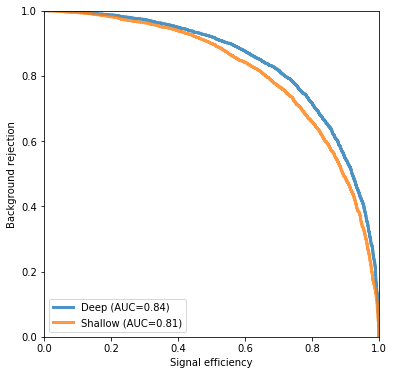

In [8]:
plt.figure(figsize=(6,6))
plt.plot(tpr_deep, 1.0-fpr_deep, lw=3, alpha=0.8,
        label="Deep (AUC={:.2f})".format(auc_deep))
plt.plot(tpr_shallow, 1.0-fpr_shallow, lw=3, alpha=0.8,
        label="Shallow (AUC={:.2f})".format(auc_shallow))
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.legend(loc=3)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.savefig("HIGGS_roc.png", bbox_inches="tight")

![Baldi](baldi_roc.png)